Titatic Data Analytics  - what factor made people more likely to survive the shinking of the Titanic? What ever the amount passerger paid is right or wrong? what is the chances to survive for worker. 

LOAD DATA TO DATAFRAME

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

original_df = pd.read_csv('train.csv')

print ('# of passengers in original data: ',str(len(original_df.index)))

original_df.head()


# of passengers in original data:  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA WRANGLING

Data Wrangling : Befor analysis, it is importnet to ensure there are no incorrect/missing data that could bias our result. It is called sample correction.

In [5]:
original_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Conclusion1: We Need to remove any passengers who did not have an age[177]/embarking station[2].But we'll not remove the passenger who did not have any cabin,beacuse 1 passenger booked the cabin for multiple passenger. 

Remove passengers who did not have an age

In [7]:
age_wrang_df = original_df[pd.notnull(original_df['Age'])]
print('No. of passenger with age: ',str(len(age_wrang_df.index)))

No. of passenger with age:  714


Remove passengers who did not have an embarking station

In [9]:
embark_wrang_df = age_wrang_df[pd.notnull(age_wrang_df['Embarked'])]
print('No. of passenger with Embarked: ',str(len(embark_wrang_df.index)))

No. of passenger with Embarked:  712


START ANALYTICS:

Find the Total Survival Rate

In [19]:
print('Total Survival Rate: ',str(round(embark_wrang_df['Survived'].mean(),3)))

Total Survival Rate:  0.404


Effect of Gender

In [16]:
gen_data = embark_wrang_df.groupby('Sex',as_index=False)
gen_data_mean=gen_data.mean()
gen_data_mean

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,440.154440,0.752896,2.073359,27.745174,0.644788,0.714286,47.332433
1,male,453.412804,0.205298,2.335541,30.726645,0.439294,0.271523,27.268836


HYPOTHESIS

Hypothesis 1: Female survive more [75%] if we compare with male[20%]. 

Hypothesis 2: Average age of survival female and male respectively 27 and 30.

Hypothesis 3: A lot of female passegers has been servived [71%] whoes have the children.

Hypothesis 4: Greater number of female survived whoes have sibling/spouse [64% vs 43%]

Hypothesis 5: Survived Female fair much higher as compared to men [47 vs 27]

START HYPOTHESIS TESTING

Start to find Total no. of male and female pessenger

In [36]:
total_df= gen_data['PassengerId'].count()
total_df

,Sex,PassengerId
0,female,259
1,male,453


Rename pessenger id to Total

In [37]:
total_df.columns = ['Sex','Total']
total_df

,Sex,Total
0,female,259
1,male,453


Save 'Sex' column in list for future plot

In [38]:
gen_list = total_df['Sex']
del total_df['Sex']
total_df

,Total
0,259
1,453


Find number of male and female that survived 

In [41]:
gen_surv_df = gen_data['Survived'].sum()
gen_surv_df
del gen_surv_df['Sex']
gen_surv_df

,Survived
0,195
1,93


Create a vector by combining the two dataset as survived and total.

In [43]:
comb_df = total_df.add(gen_surv_df,fill_value=0)
comb_df

,Survived,Total
0,195.0,259.0
1,93.0,453.0


Conclution of Hypothesis Testing 1:It Appear, on average women more than 3 times likely survived than men. 

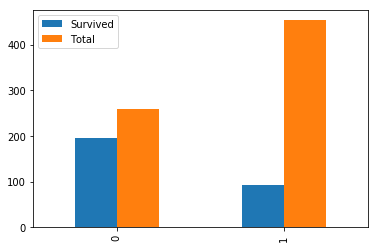

In [84]:
comb_df.plot.bar()


What is the effect of age on survival rate?
what is the effect of company on suvival rate?
what is the effect of socio-economic status on survival rate?

In [86]:
suv_data = embark_wrang_df.groupby('Survived', as_index=False)
suv_mean_data = suv_data.mean()
suv_mean_data

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,442.299528,2.485849,30.626179,0.525943,0.365566,22.965456
1,1,457.850694,1.878472,28.193299,0.496528,0.531250,51.647672


Survivors are younger (28 vs 30) are from higher socio-economic class(Fare [51 vs 22]) with less sibling/spouse [.49 vs .52] and travel with parents/children [.53 vs .36] 